# 7장 시계열을 위한 상태공간 모델 - R (HMM)

> 시계열을 위한 상태공간 모델 중 HMM에 대한 소스코드 입니다.
- author: "Chansung Park"
- toc: false
- comments: false
- categories: [state space model, HMM, R]
- permalink: /chapter7-hmm/
- badges: true
- hide_github_badge: true

In [ ]:
set.seed(123) 

bull_mu    <-  0.1
bull_sd    <-  0.1

neutral_mu <-  0.02
neutral_sd <-  0.08

bear_mu    <- -0.03
bear_sd    <-  0.2

panic_mu   <- -0.1
panic_sd   <-  0.3

mus <- c(bull_mu, neutral_mu, bear_mu, panic_mu)
sds <- c(bull_sd, neutral_sd, bear_sd, panic_sd)

NUM.PERIODS     <- 10
SMALLEST.PERIOD <- 20
LONGEST.PERIOD  <- 40

days <- sample(SMALLEST.PERIOD:LONGEST.PERIOD, NUM.PERIODS, 
               replace = TRUE)

returns  <- numeric()
true.mean <- numeric()
for (d in days) {
  idx = sample(1:4, 1, prob = c(0.2, 0.6, 0.18, 0.02))
  returns <- c(returns, rnorm(d, mean = mus[idx], sd = sds[idx]))
  true.mean <- c(true.mean, rep(mus[idx], d))
}               

In [ ]:
table(true.mean)


true.mean
-0.03  0.02   0.1 
   66   142   111 

In [ ]:
install.packages('depmixS4')
require(depmixS4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
hmm.model  <- depmix(returns ~ 1, family = gaussian(), 
                    nstates = 4, data=data.frame(returns=returns))
model.fit  <- fit(hmm.model)
post_probs <- posterior(model.fit)

converged at iteration 357 with logLik: 265.7247 


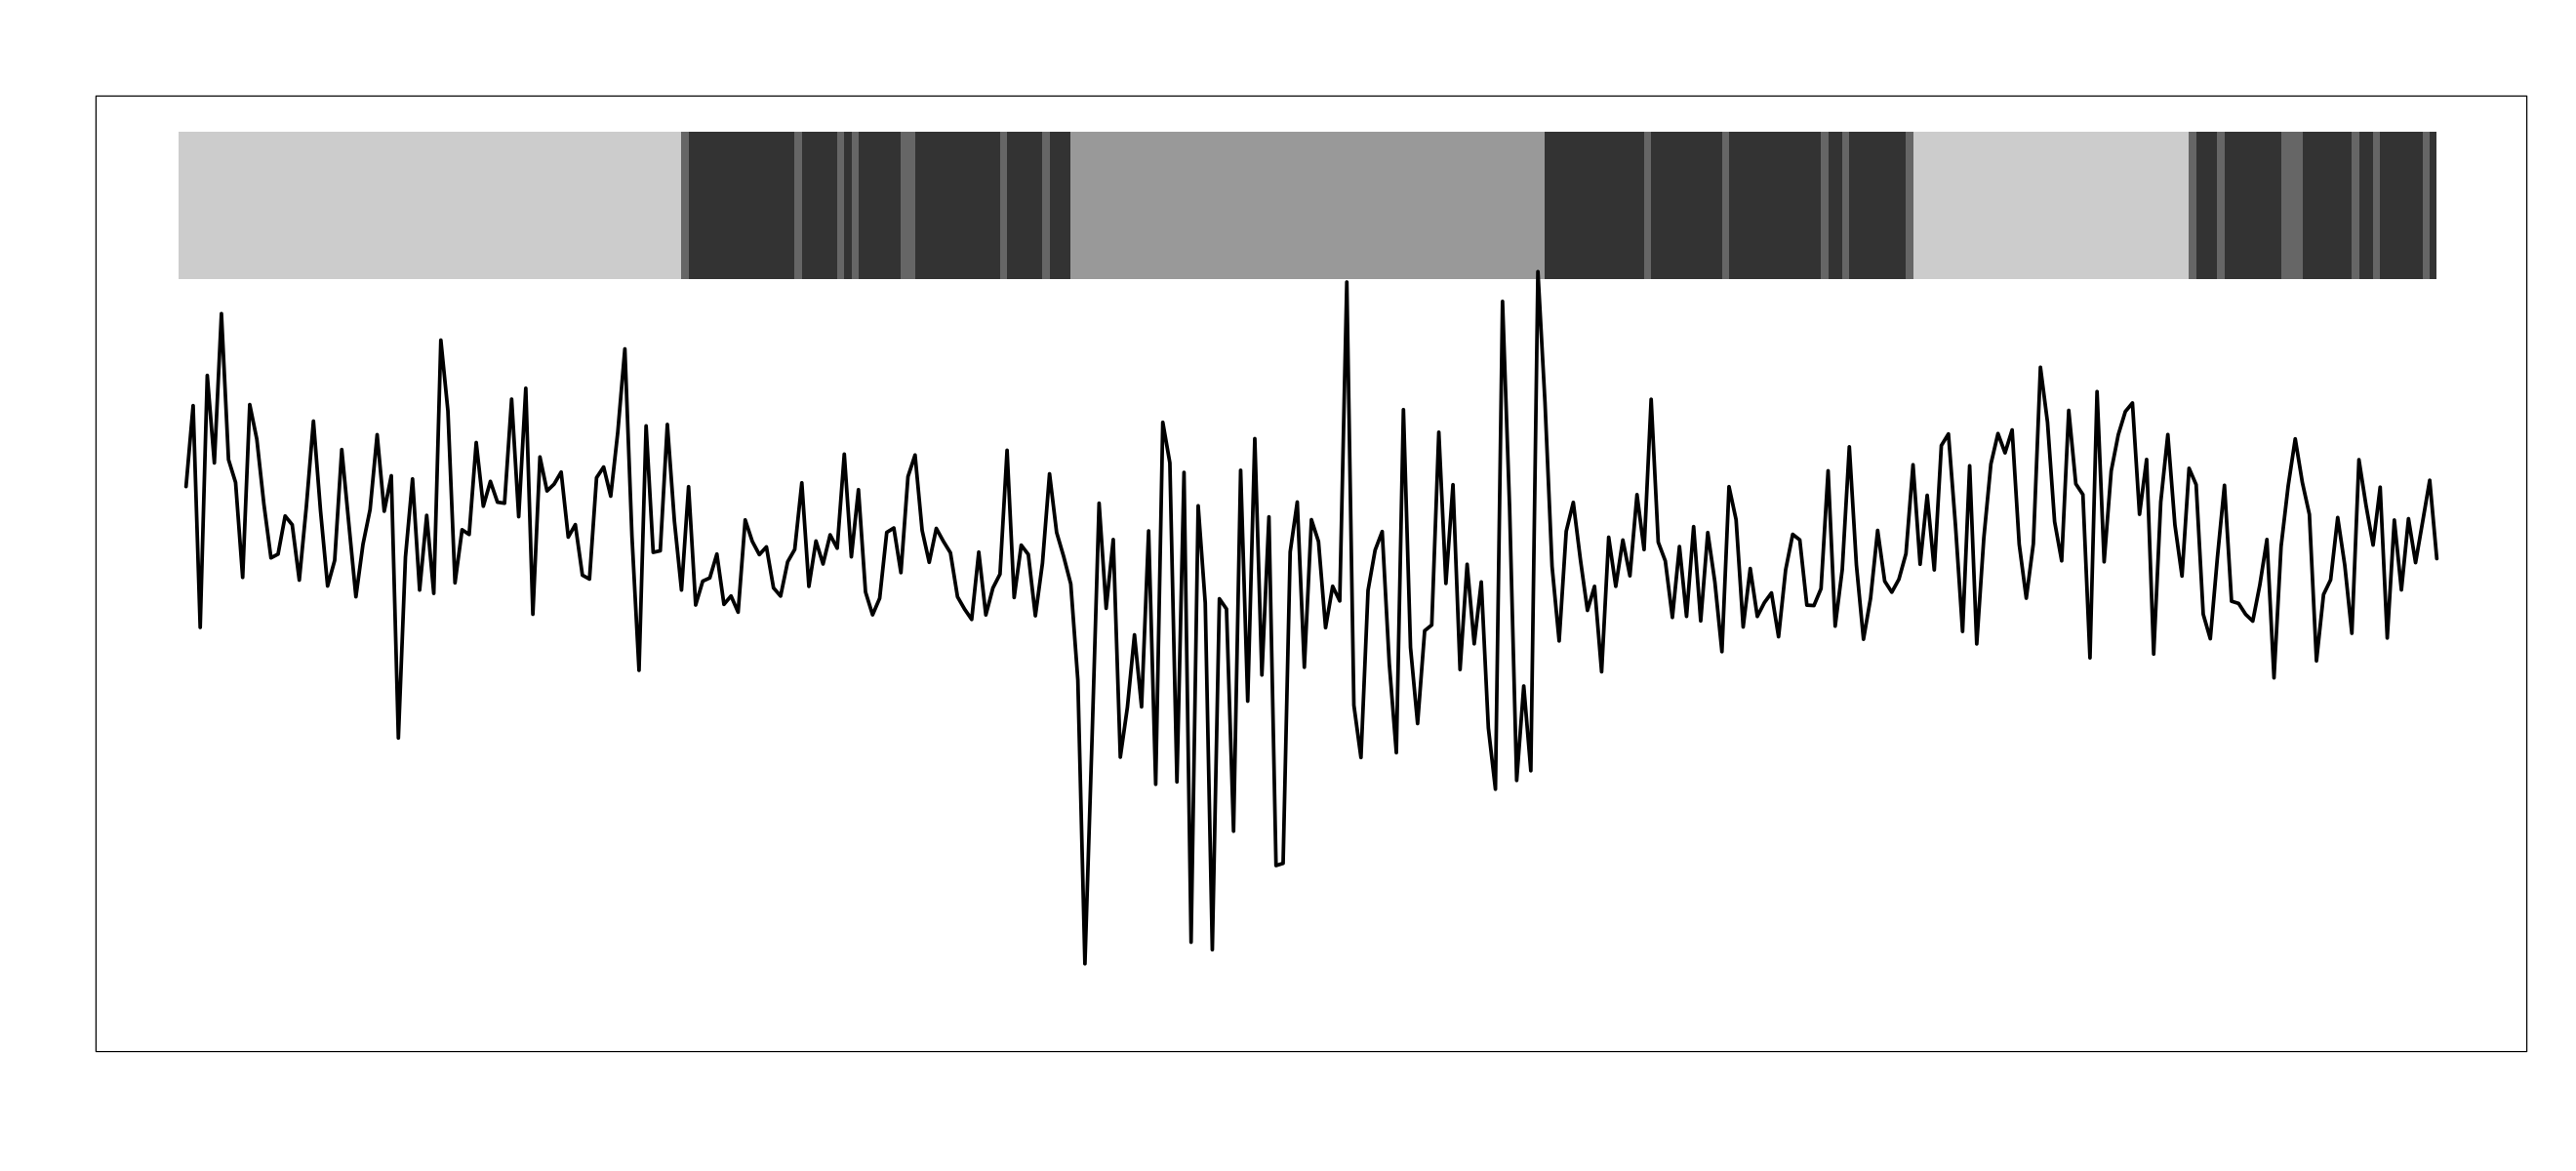

In [ ]:
options(repr.plot.width=22, repr.plot.height=10)

plot(returns, type = 'l', lwd = 3, col = 1, 
     yaxt = "n", xaxt = "n", xlab = "", ylab = "",
     ylim = c(-0.6, 0.6))

invisible(lapply(0:(length(returns) - 1), function (i) {
  rect(i,0.4,(i + 1),0.6, 
       col = rgb(0.0,0.0,0.0,alpha=(0.2 * post_probs$state[i + 1])),
       border = NA)
}))

In [ ]:
bull_mu    <-  0.1
bull_sd    <-  0.1

neutral_mu <-  0.02
neutral_sd <-  0.08

bear_mu    <- -0.03
bear_sd    <-  0.2

panic_mu   <- -0.1
panic_sd   <-  0.3

In [ ]:
attr(model.fit, "response")

[[1]]
[[1]][[1]]
Model of type gaussian (identity), formula: returns ~ 1
Coefficients: 
(Intercept) 
 0.09774445 
sd  0.1040073 


[[2]]
[[2]][[1]]
Model of type gaussian (identity), formula: returns ~ 1
Coefficients: 
(Intercept) 
 -0.0610505 
sd  0.2018184 


[[3]]
[[3]][[1]]
Model of type gaussian (identity), formula: returns ~ 1
Coefficients: 
(Intercept) 
  0.1412881 
sd  0.03796197 


[[4]]
[[4]][[1]]
Model of type gaussian (identity), formula: returns ~ 1
Coefficients: 
(Intercept) 
0.001911518 
sd  0.05601123 

